In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import os

def fit_line(x, y1, y2, label1, label2):
    # Fit linear model for losses
    coefs1 = Polynomial.fit(x, y1, 1).convert().coef
    # Fit linear model for accs
    coefs2 = Polynomial.fit(x, y2, 1).convert().coef

    print(f"Linear fit for {label1}: y = {coefs1[1]:.4f} * x + {coefs1[0]:.4f}")
    print(f"Linear fit for {label2}: y = {coefs2[1]:.4f} * x + {coefs2[0]:.4f}")

config = json.load(open("config.json"))
N_CLASSES = config.get("N_CLASSES", 2)
N_POISONED_FLIENTS = config.get("N_POISONED_CLIENTS", 0)


In [10]:
print(f1,f2, csv_path)

CL_MODEL2_BATCH_SIZE mnist_binary_rev2 results\CL_MODEL2_BATCH_SIZE1\mnist_binary_rev2\poisoned_43\poisoned_43.csv


Batch size 1:
Linear fit for Loss: y = 4.1417 * x + -0.0119
Linear fit for Accuracy: y = -0.9914 * x + 0.7410
Batch size 2:
Linear fit for Loss: y = 2.8670 * x + 0.0935
Linear fit for Accuracy: y = -1.0615 * x + 0.8080
Batch size 4:
Linear fit for Loss: y = 2.0015 * x + 0.0713
Linear fit for Accuracy: y = -1.1970 * x + 0.9753
Batch size 8:
Linear fit for Loss: y = 1.4547 * x + 0.0350
Linear fit for Accuracy: y = -1.2031 * x + 1.1240
Batch size 16:
Linear fit for Loss: y = 1.1067 * x + 0.0268
Linear fit for Accuracy: y = -1.0462 * x + 1.1835
Batch size 32:
Linear fit for Loss: y = 0.9152 * x + 0.0333
Linear fit for Accuracy: y = -0.8583 * x + 1.1904
Batch size 1:
Linear fit for Loss: y = 0.0321 * x + 0.0131
Linear fit for Accuracy: y = -0.0027 * x + 0.9994
Batch size 2:
Linear fit for Loss: y = 0.0796 * x + 0.0320
Linear fit for Accuracy: y = -0.0042 * x + 0.9998
Batch size 4:
Linear fit for Loss: y = 0.1770 * x + 0.0495
Linear fit for Accuracy: y = -0.0086 * x + 1.0008
Batch size 8:
Li

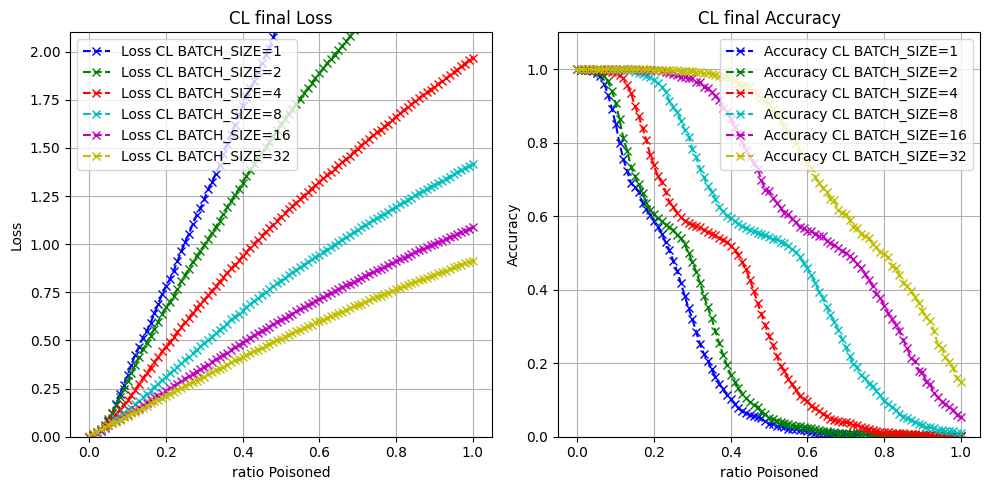

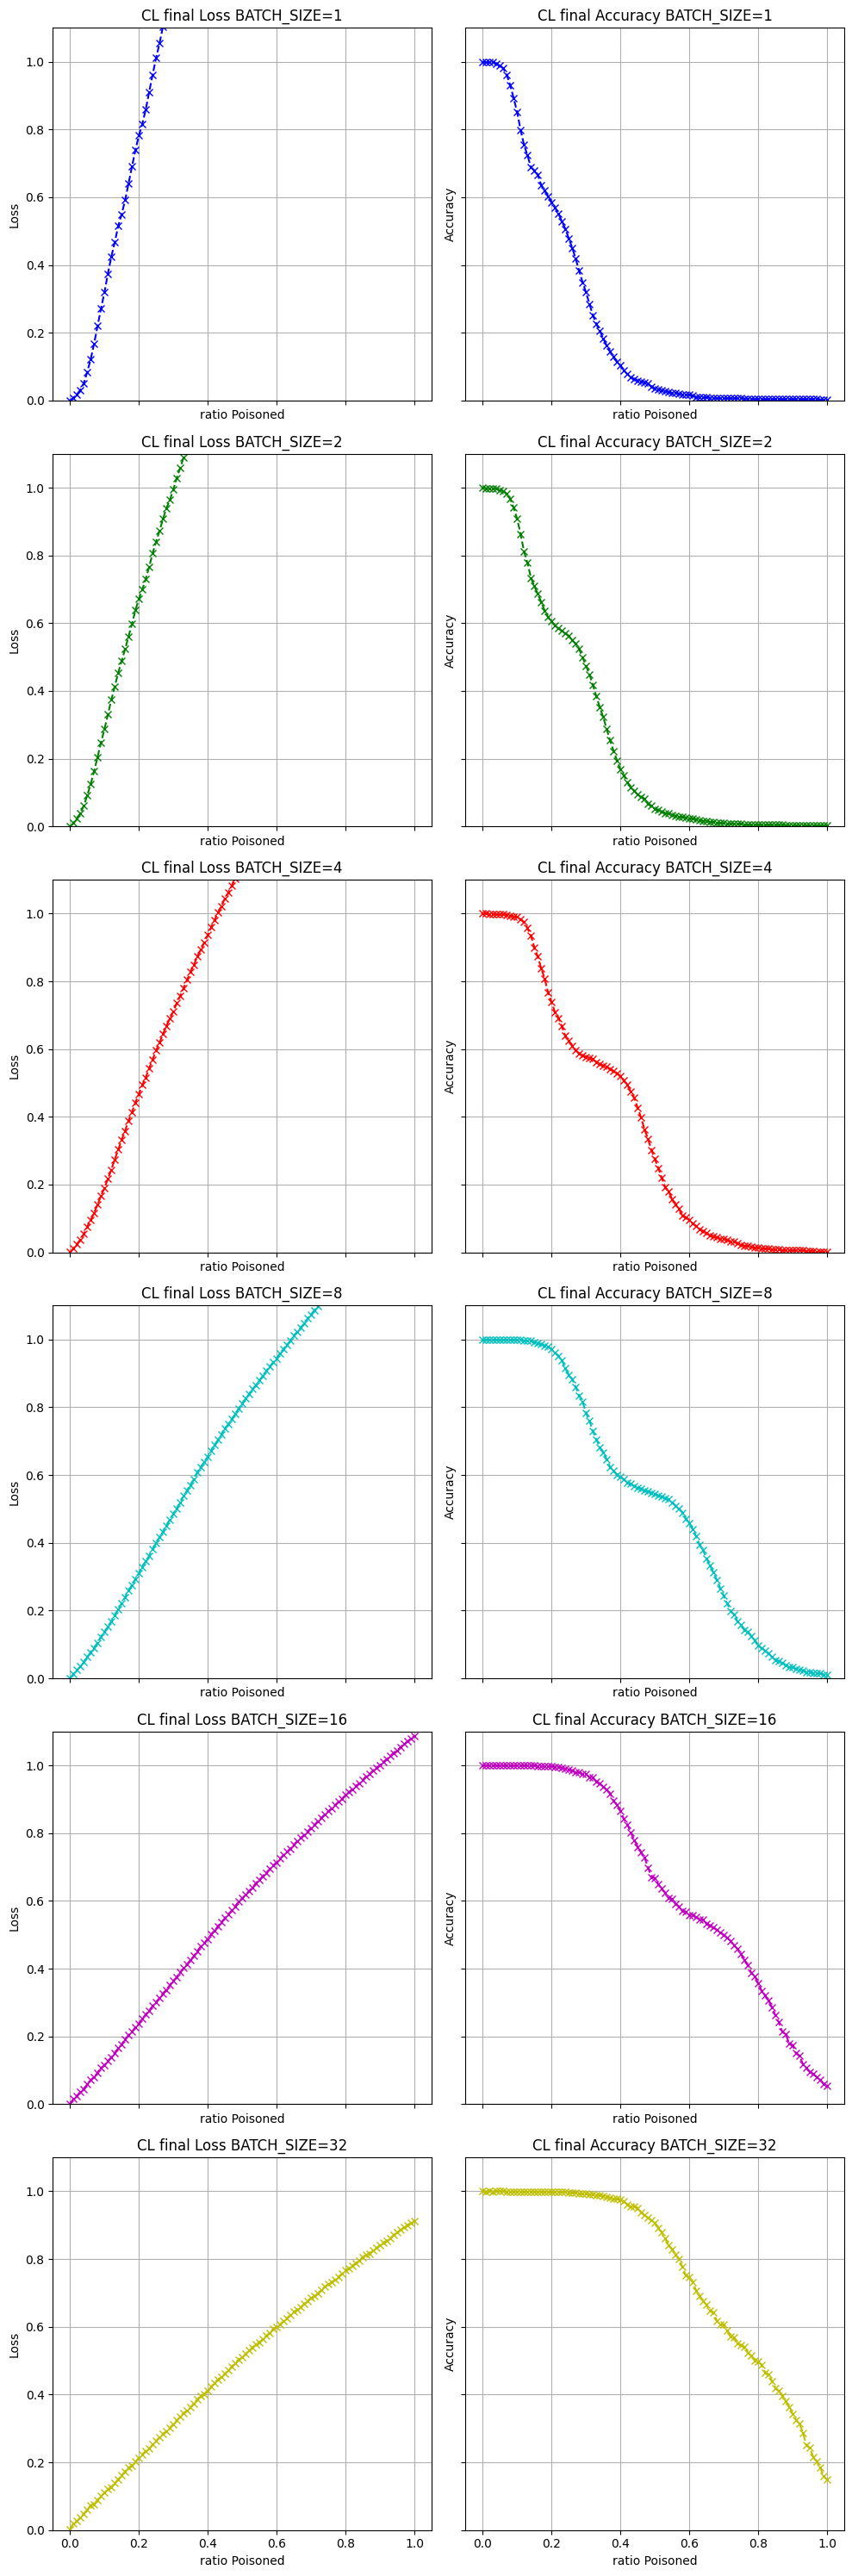

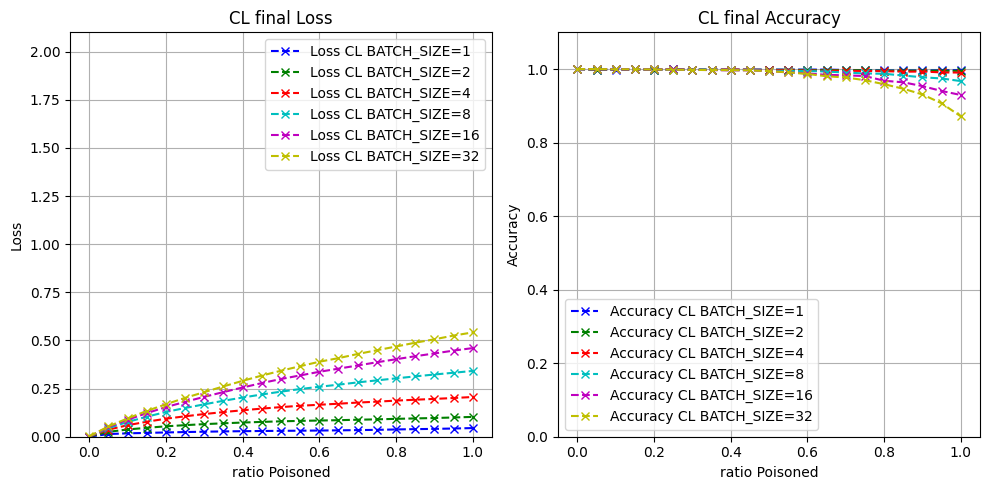

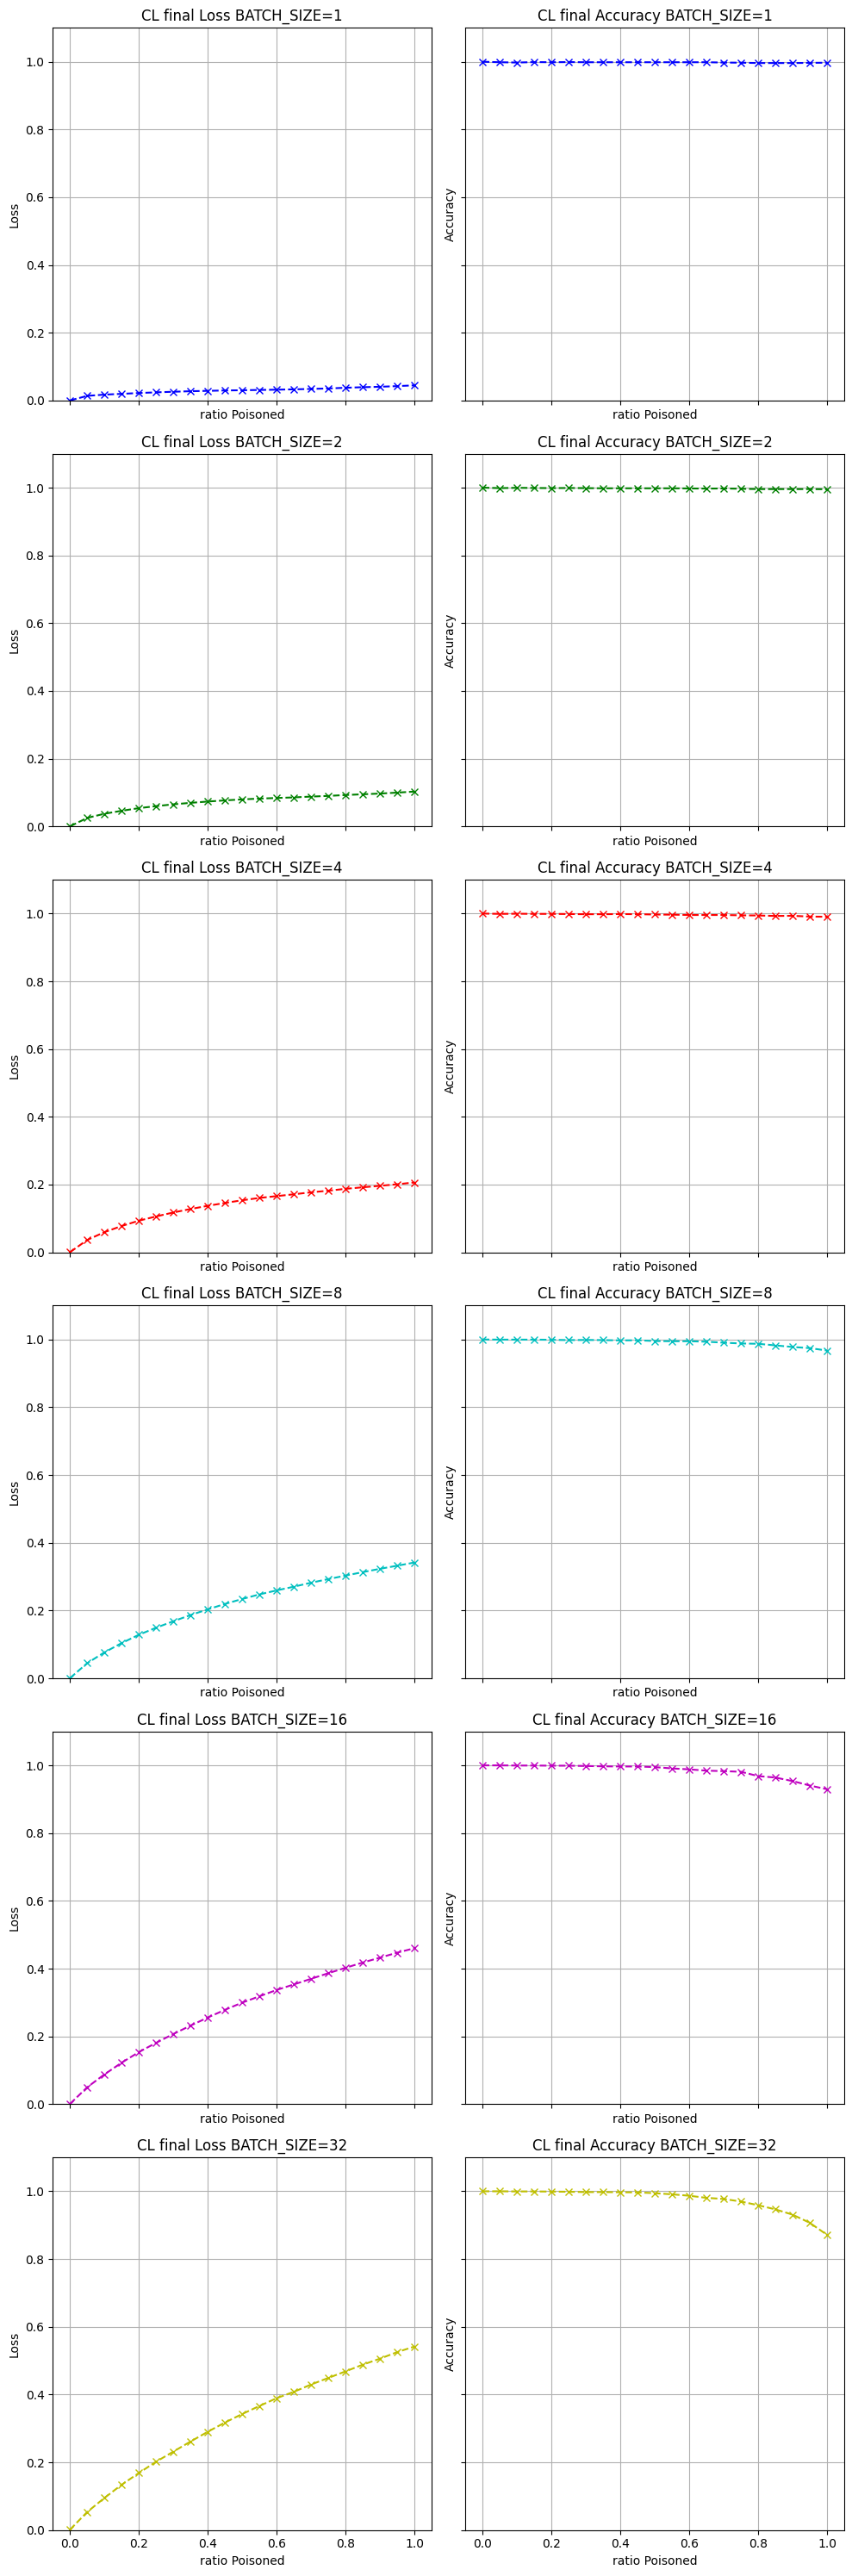

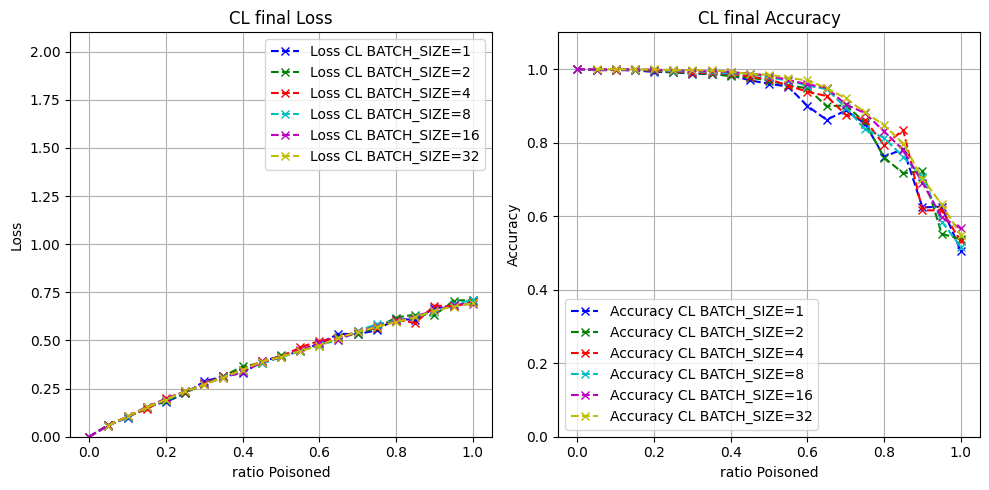

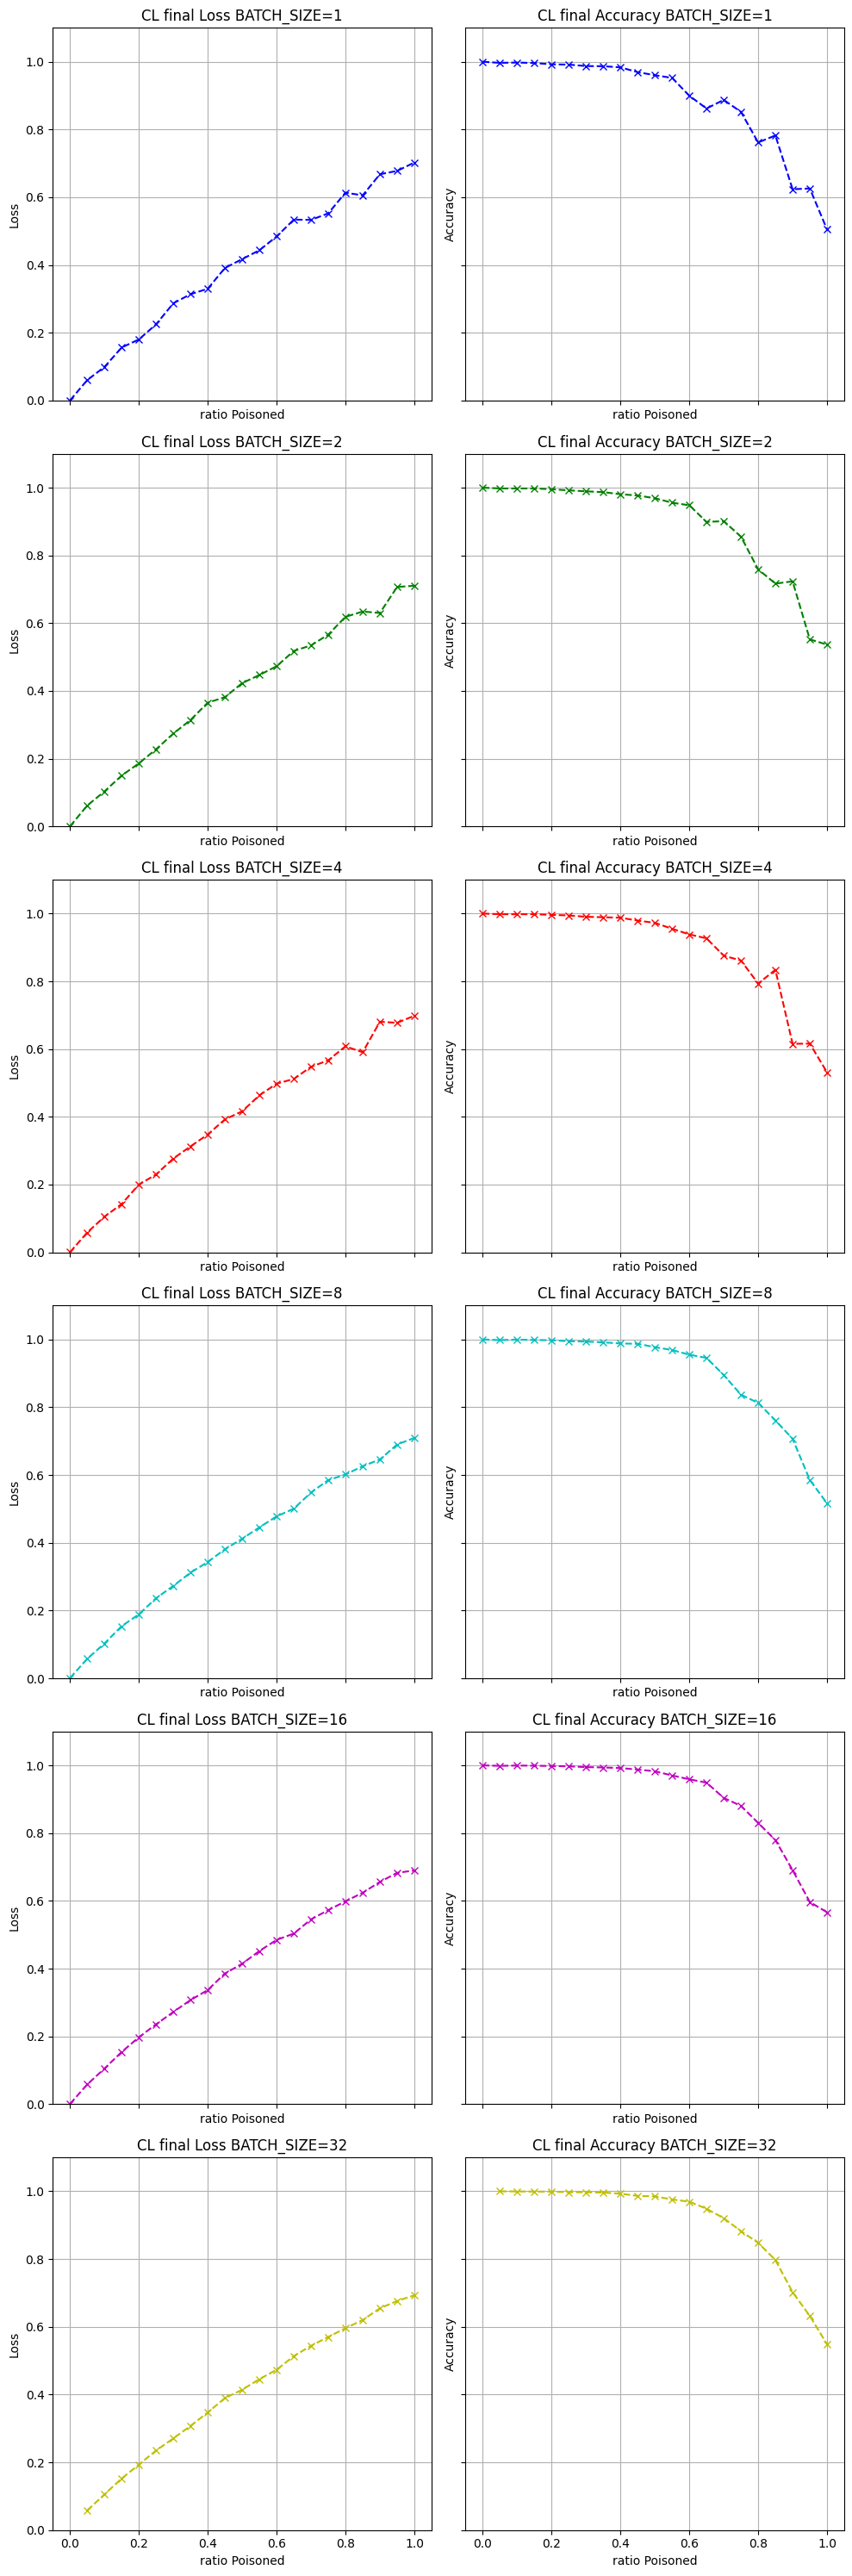

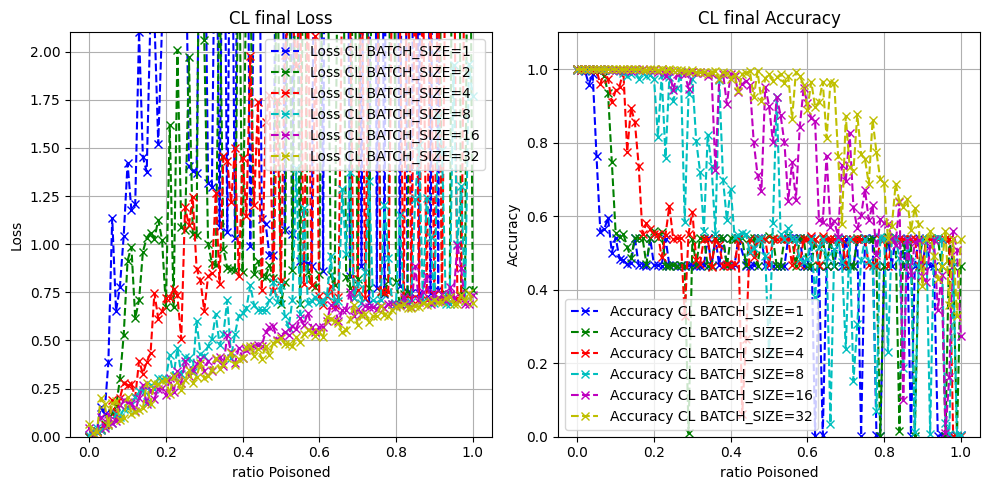

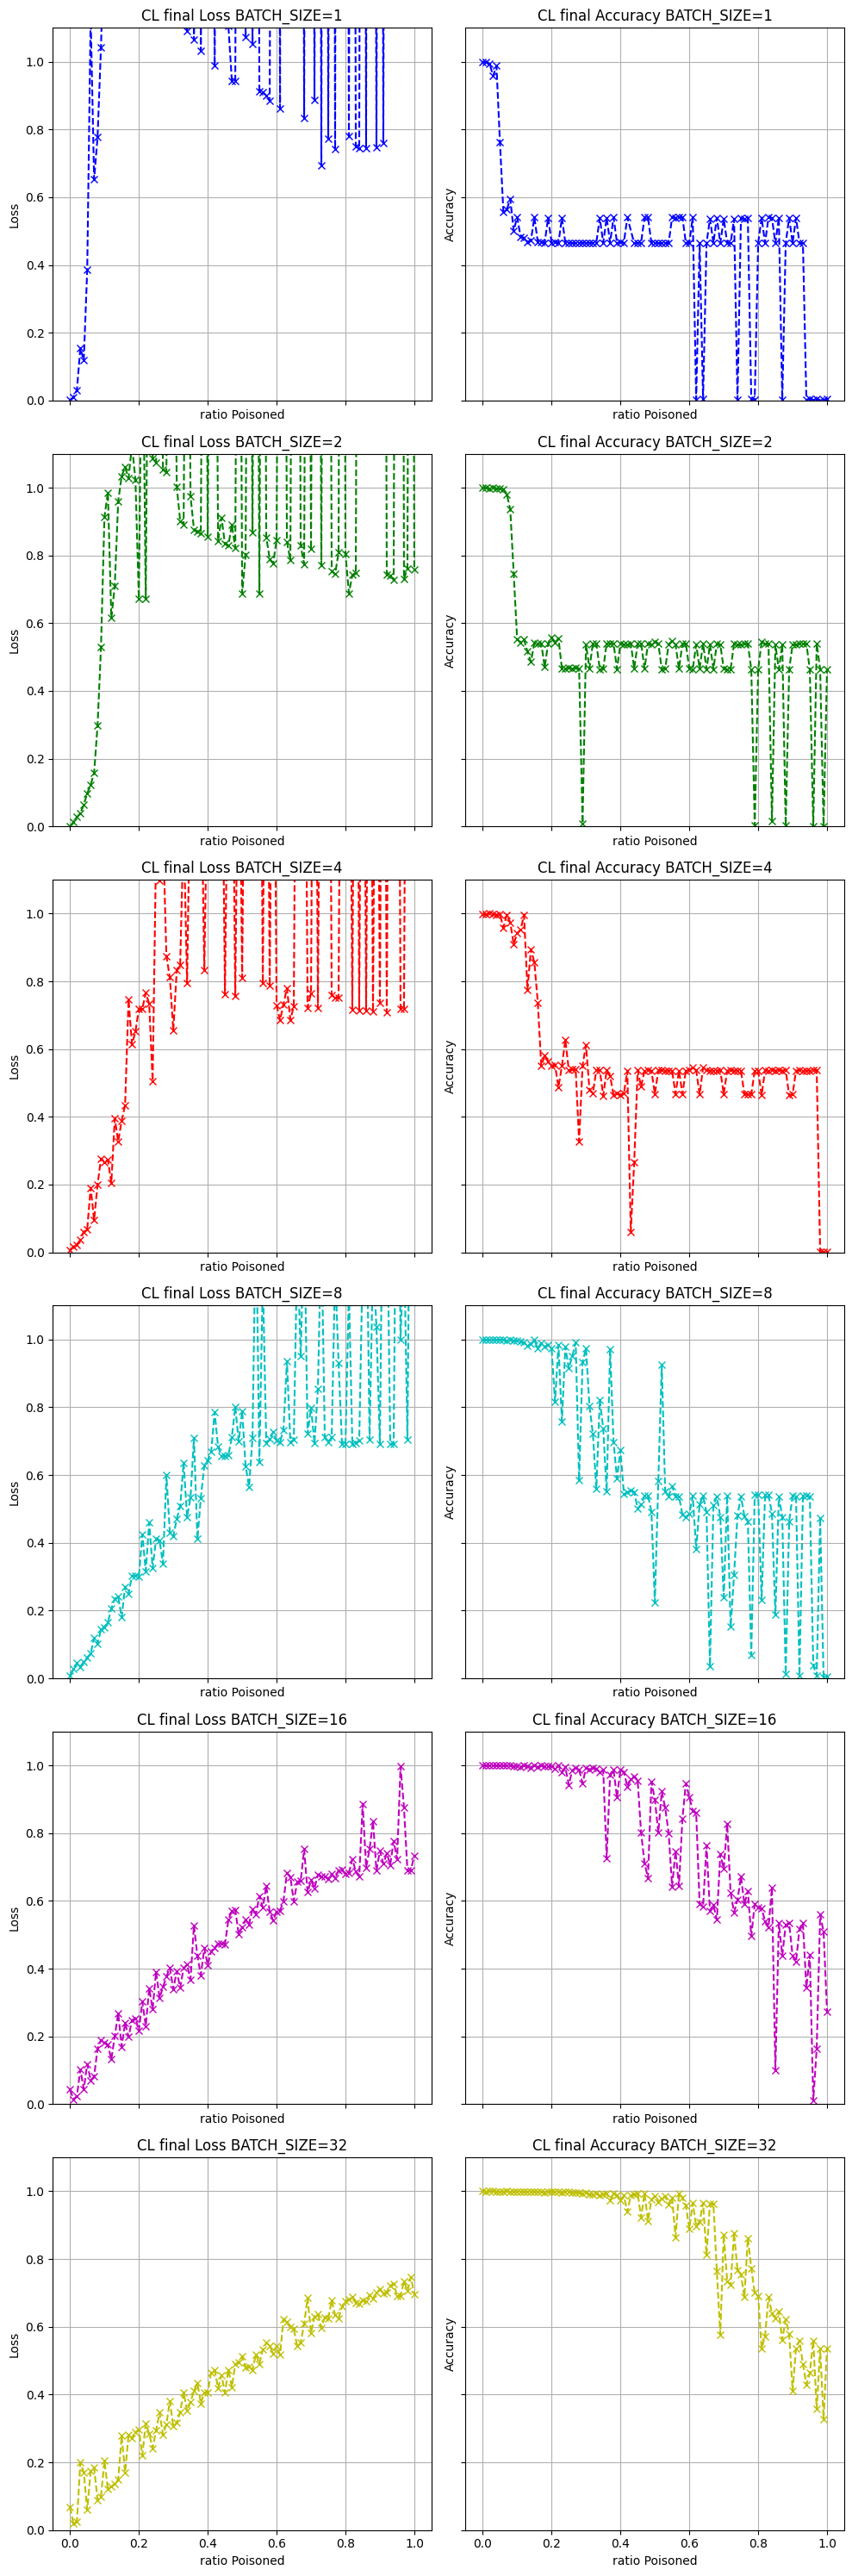

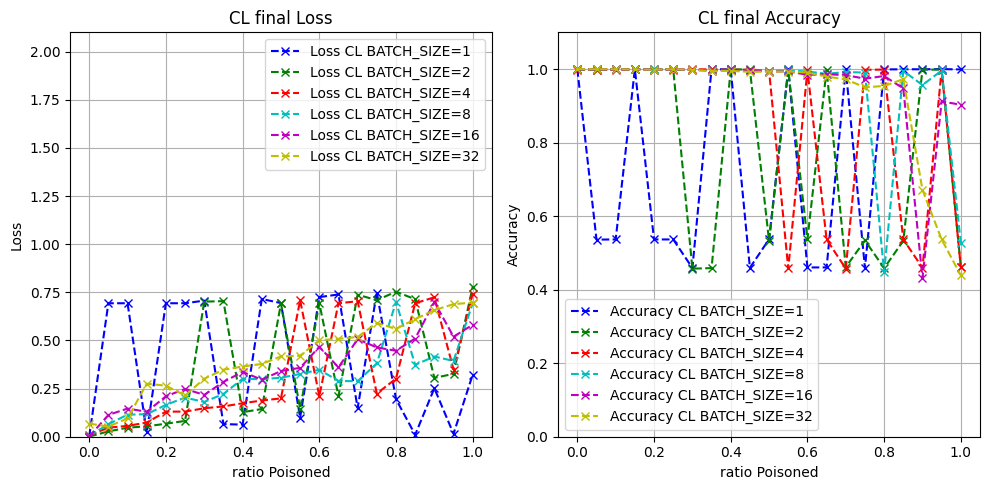

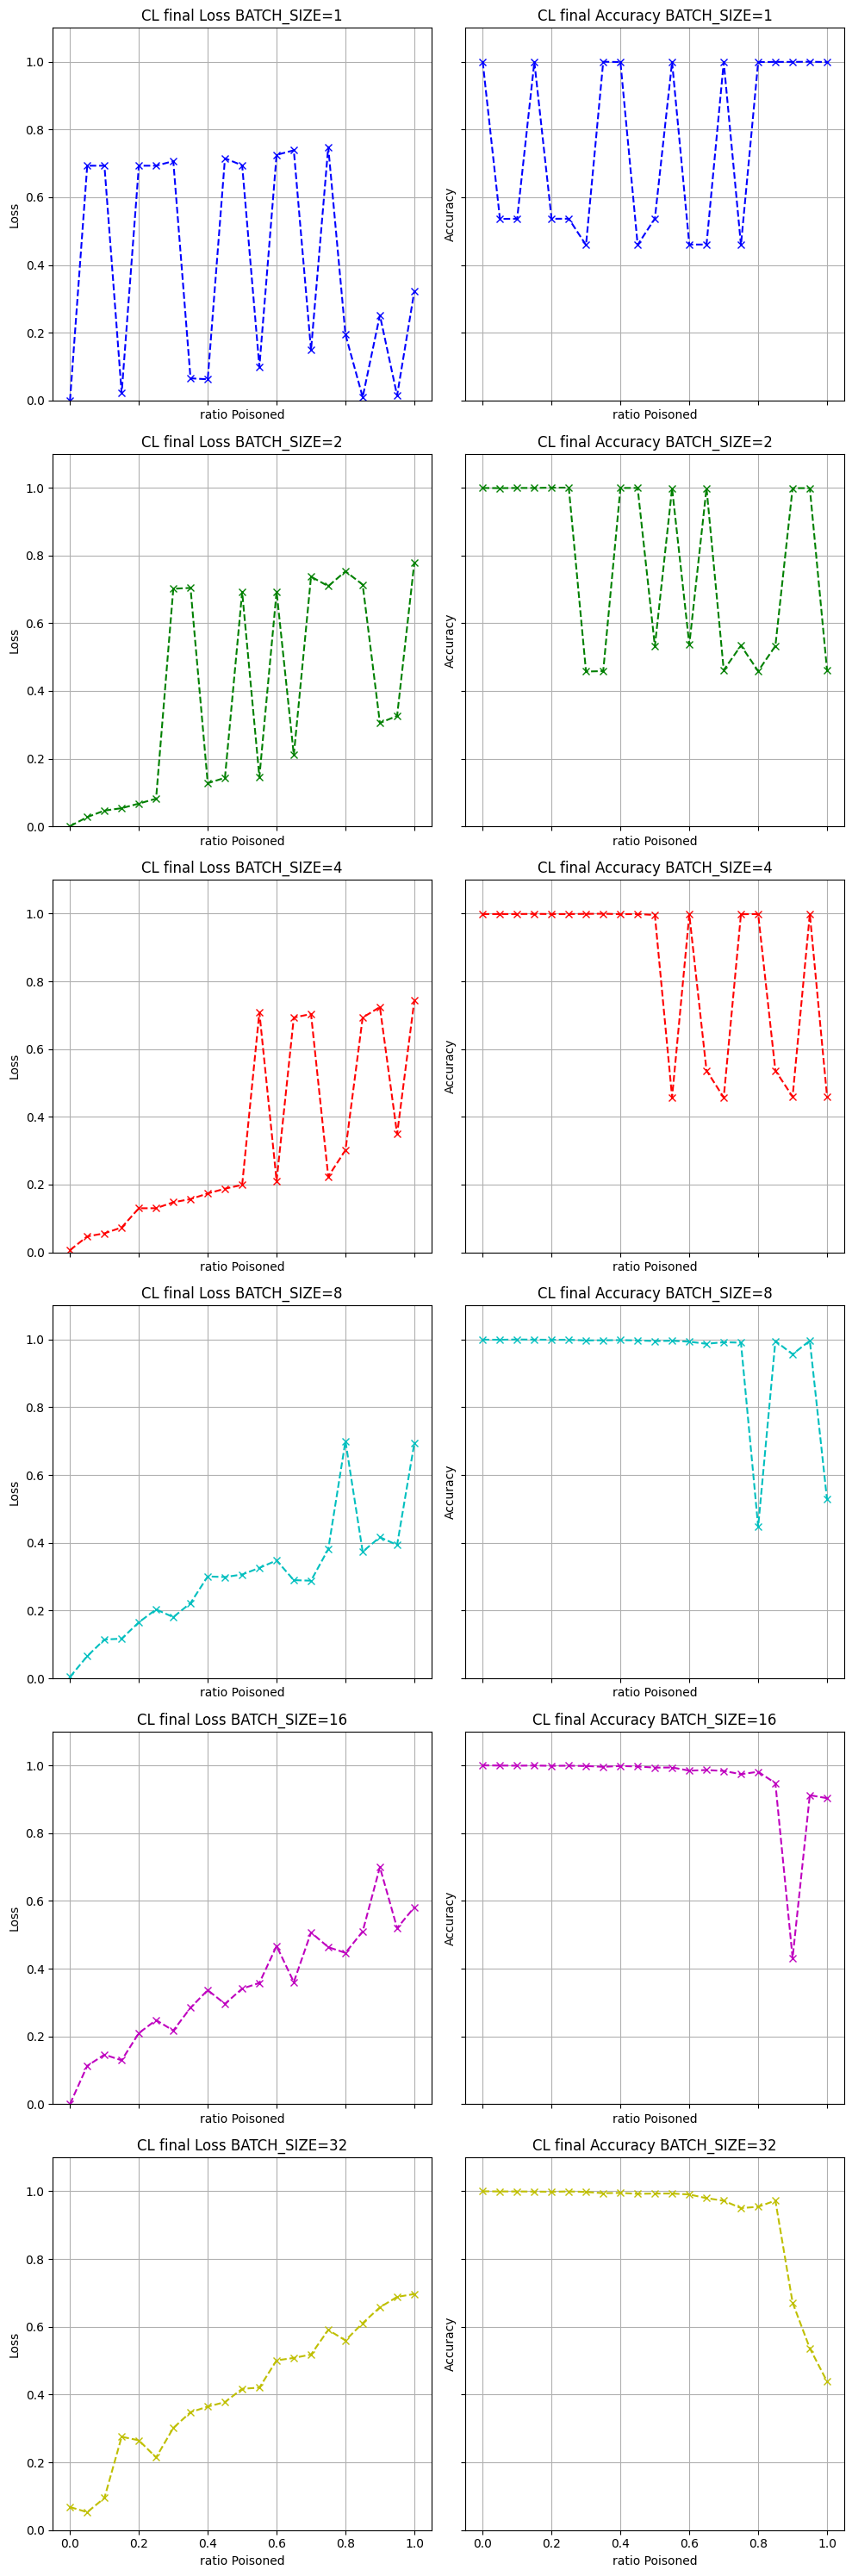

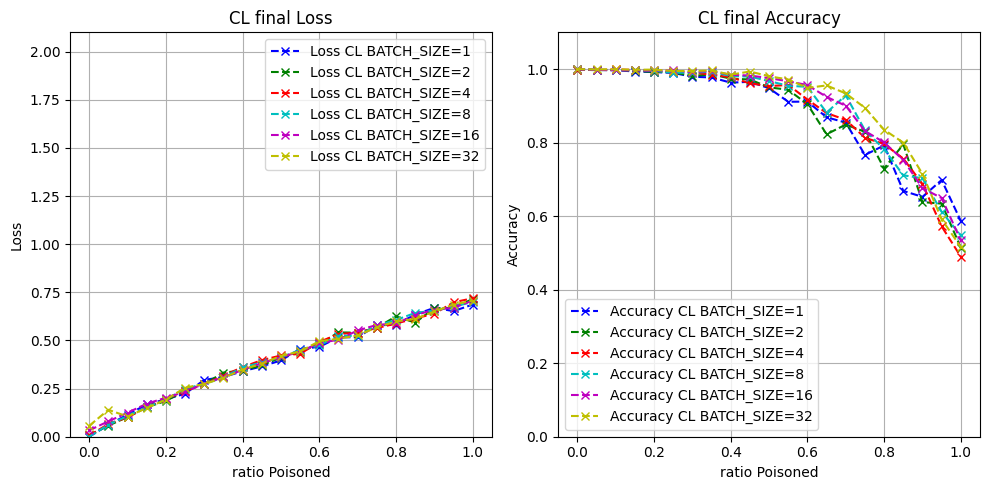

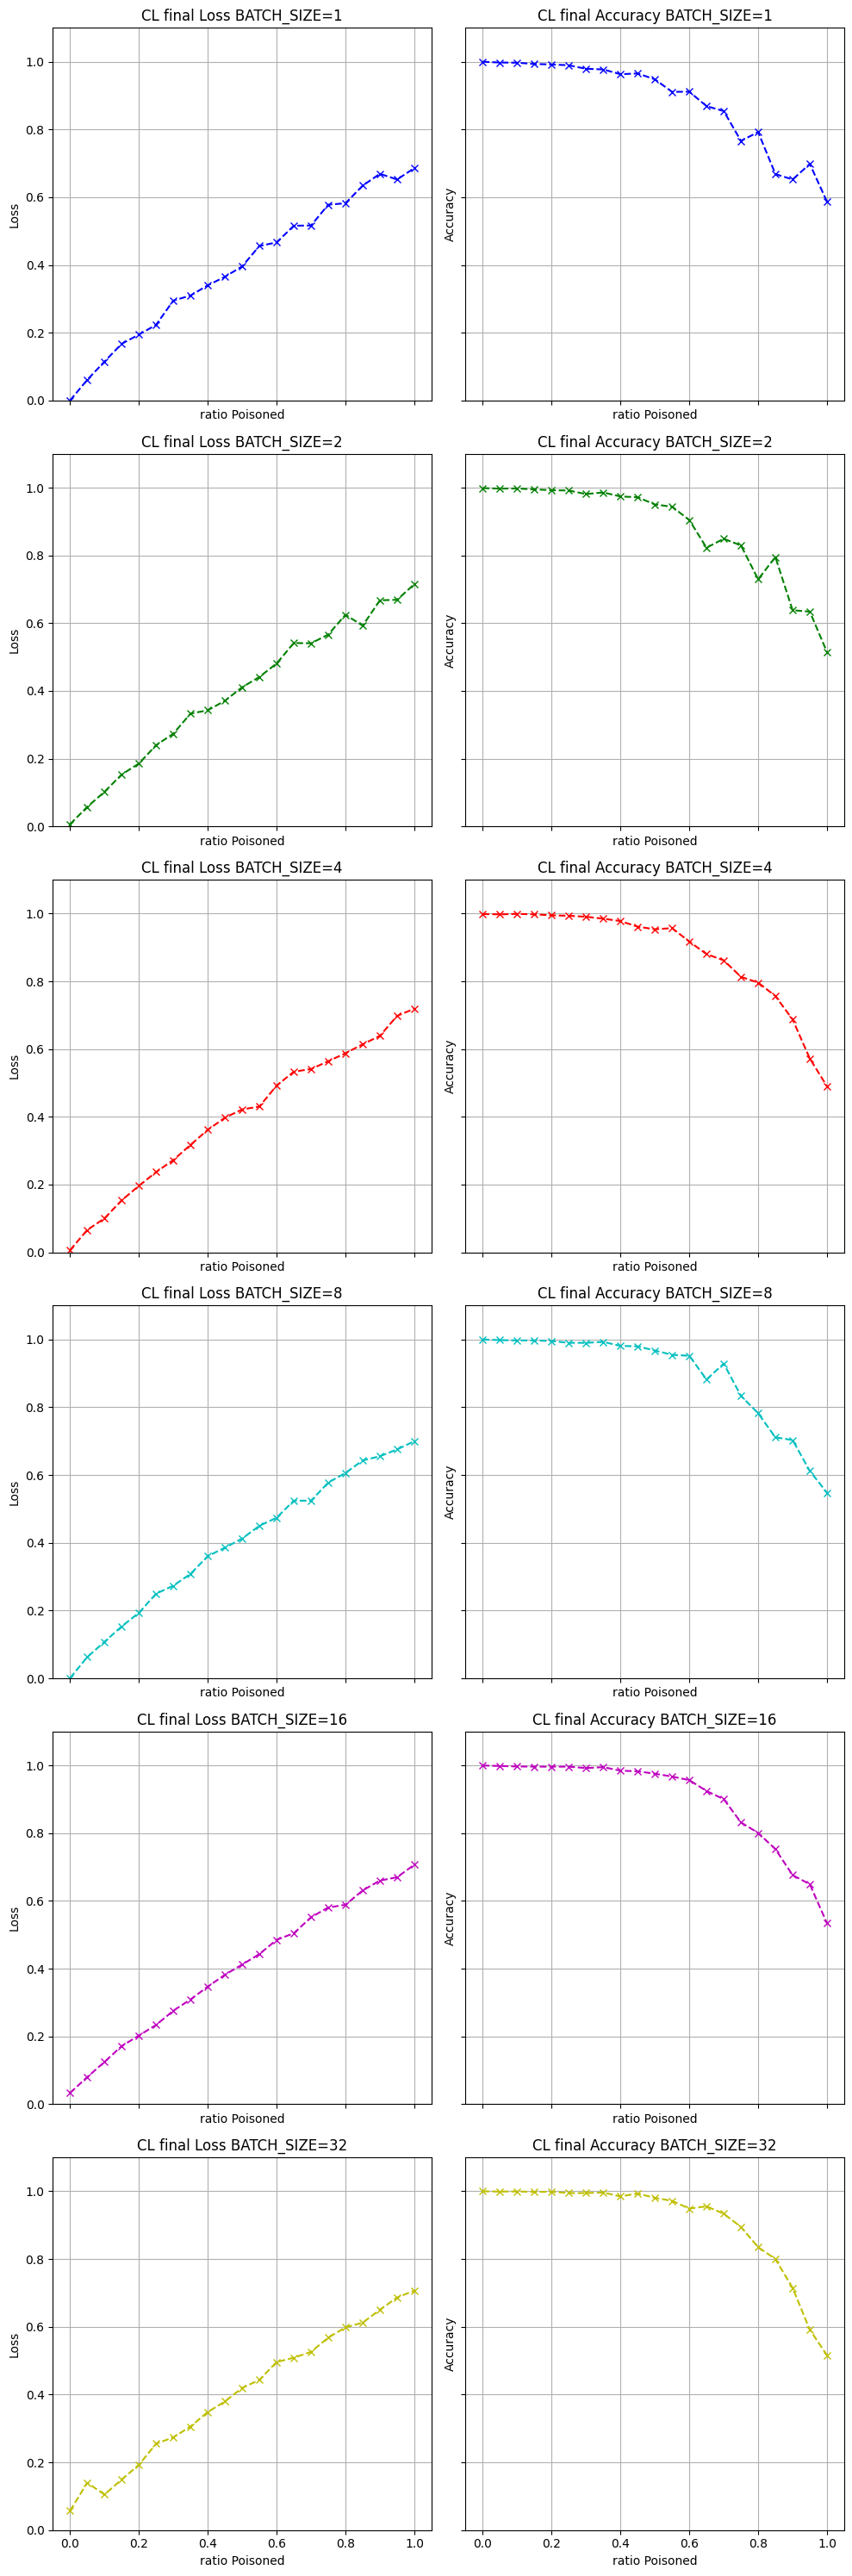

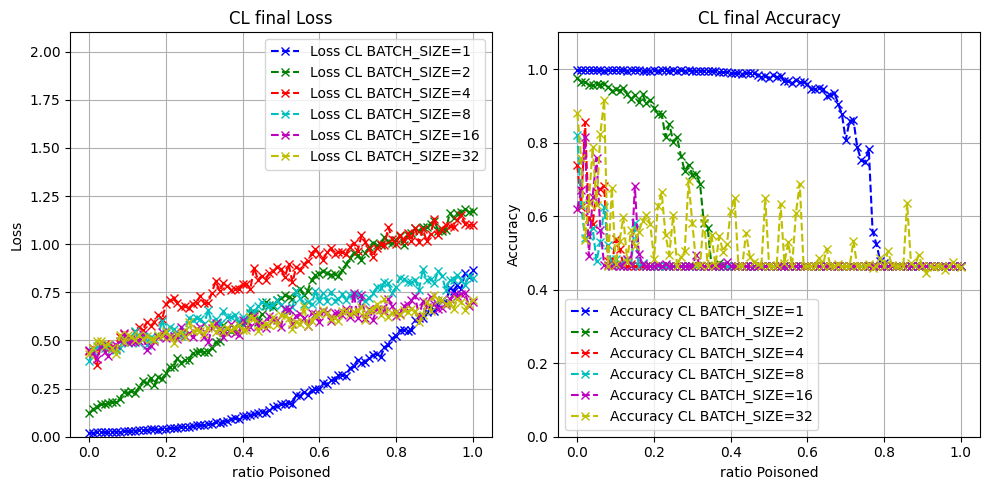

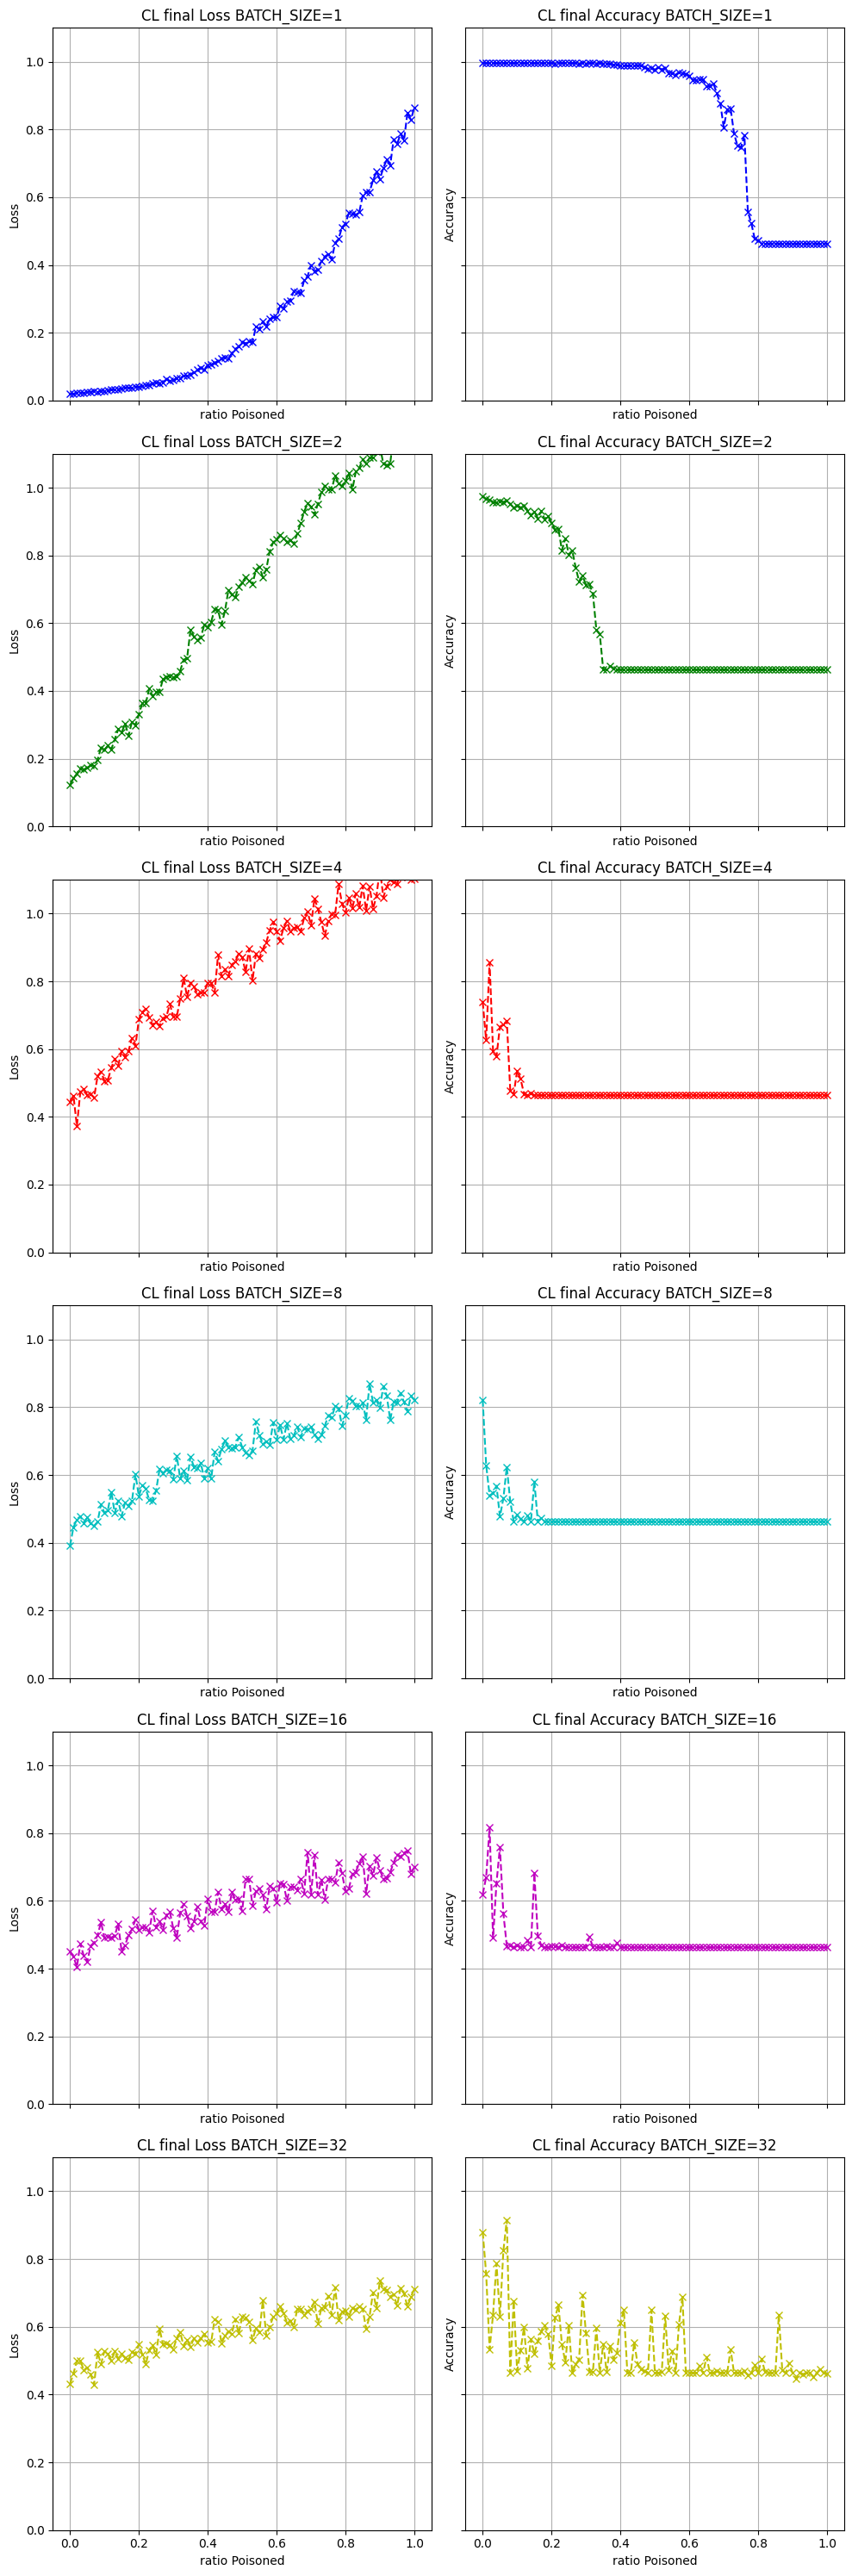

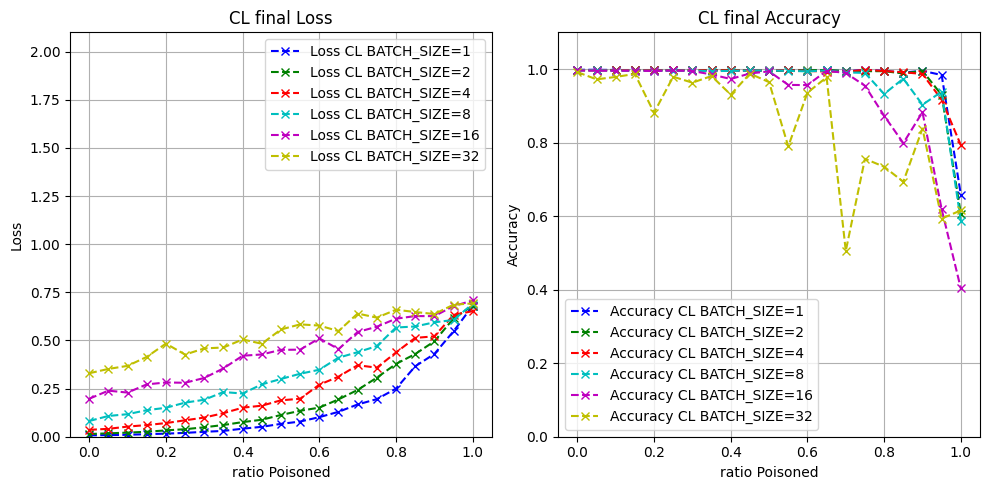

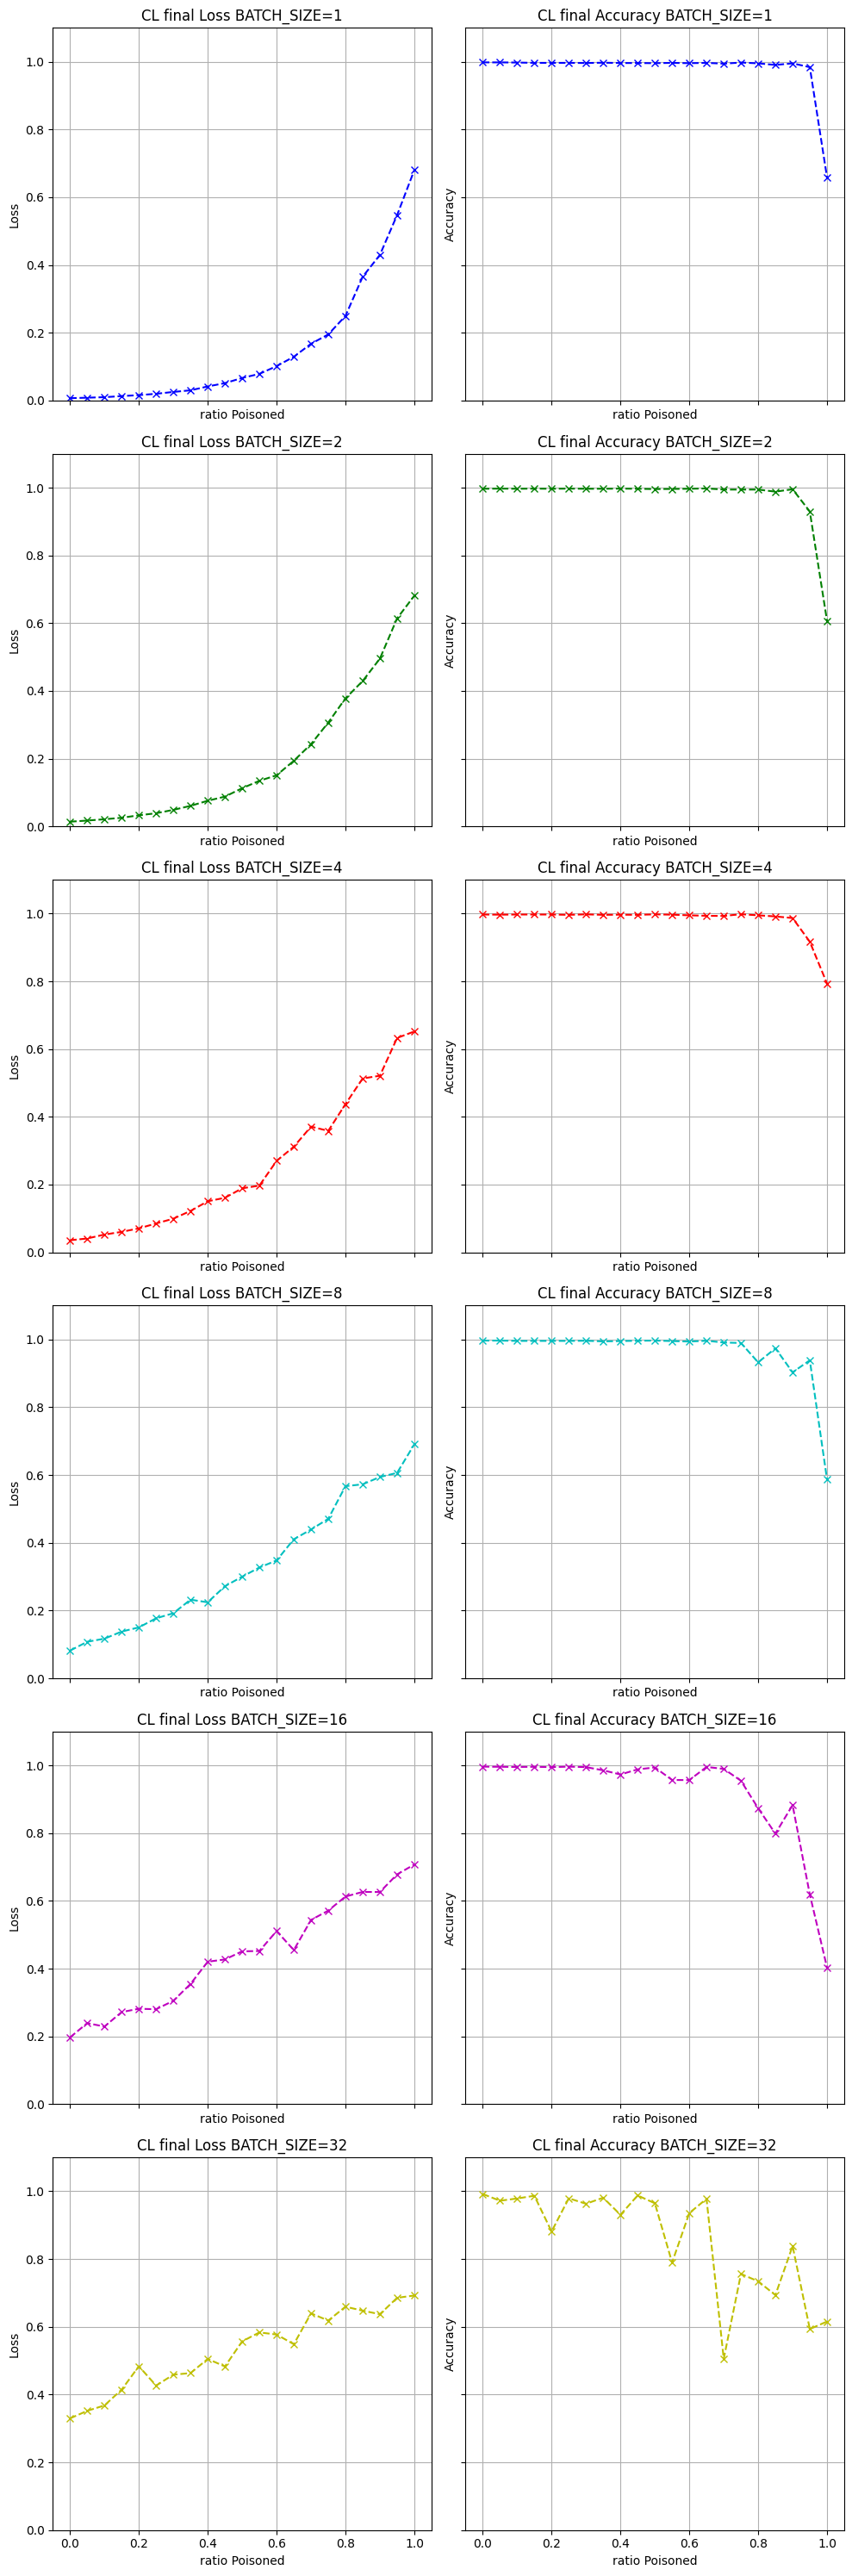

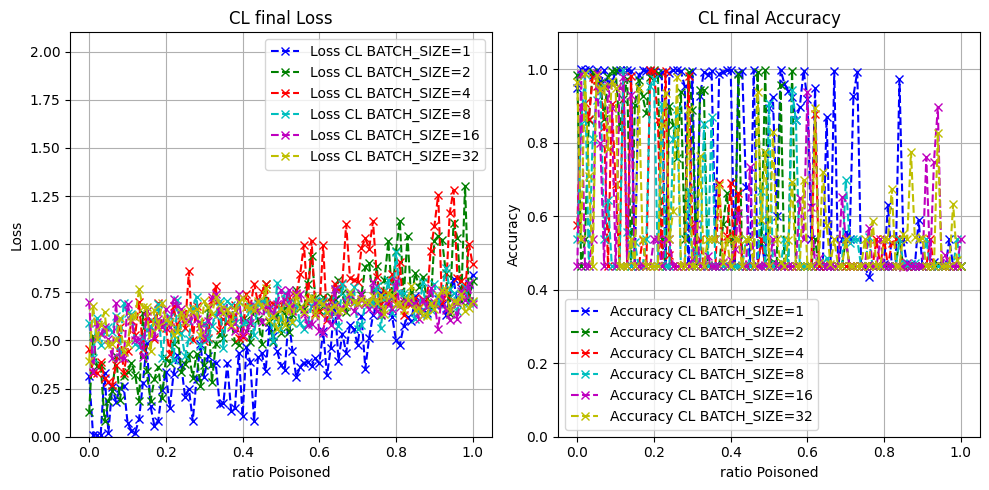

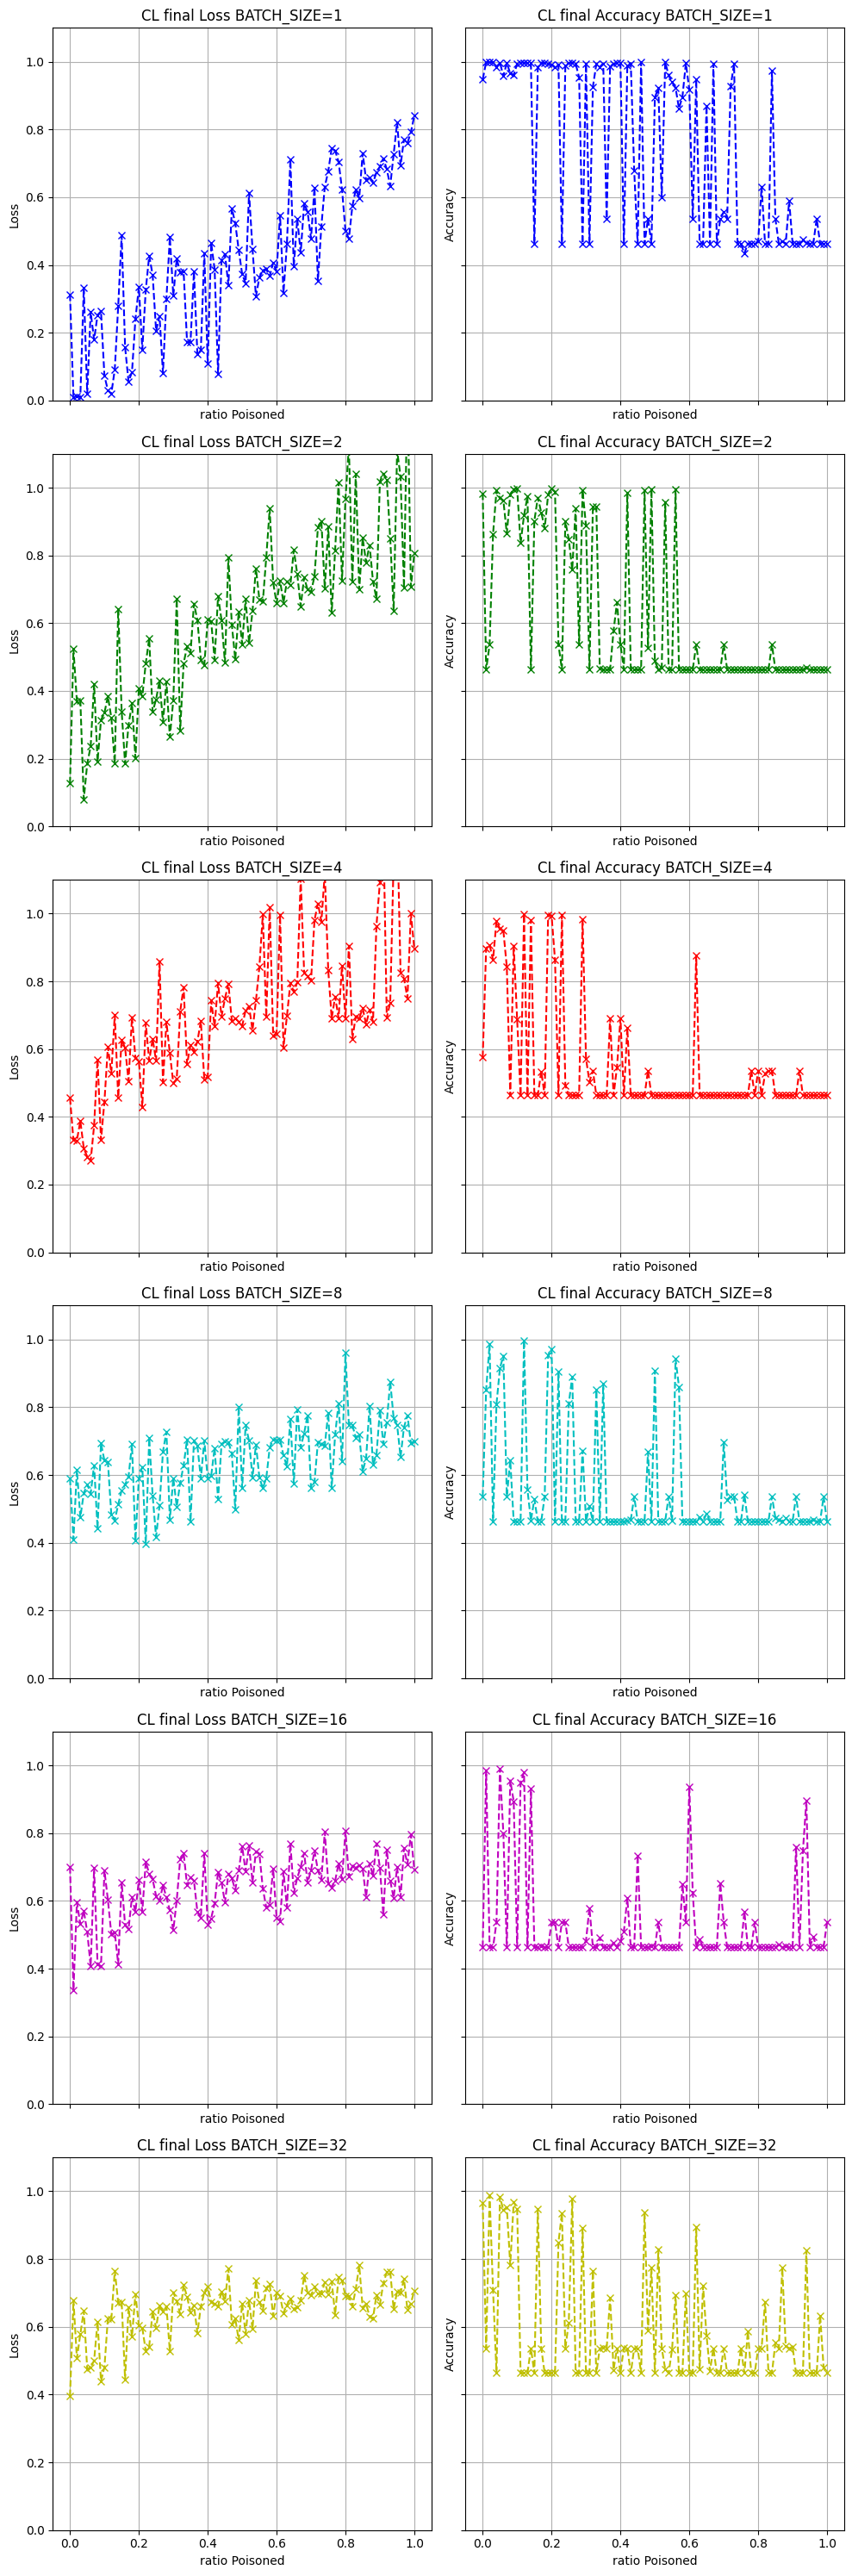

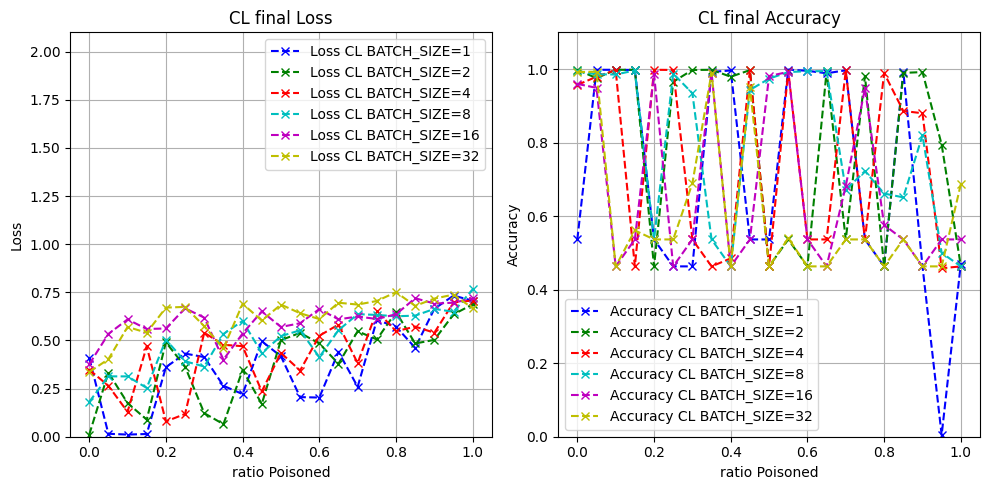

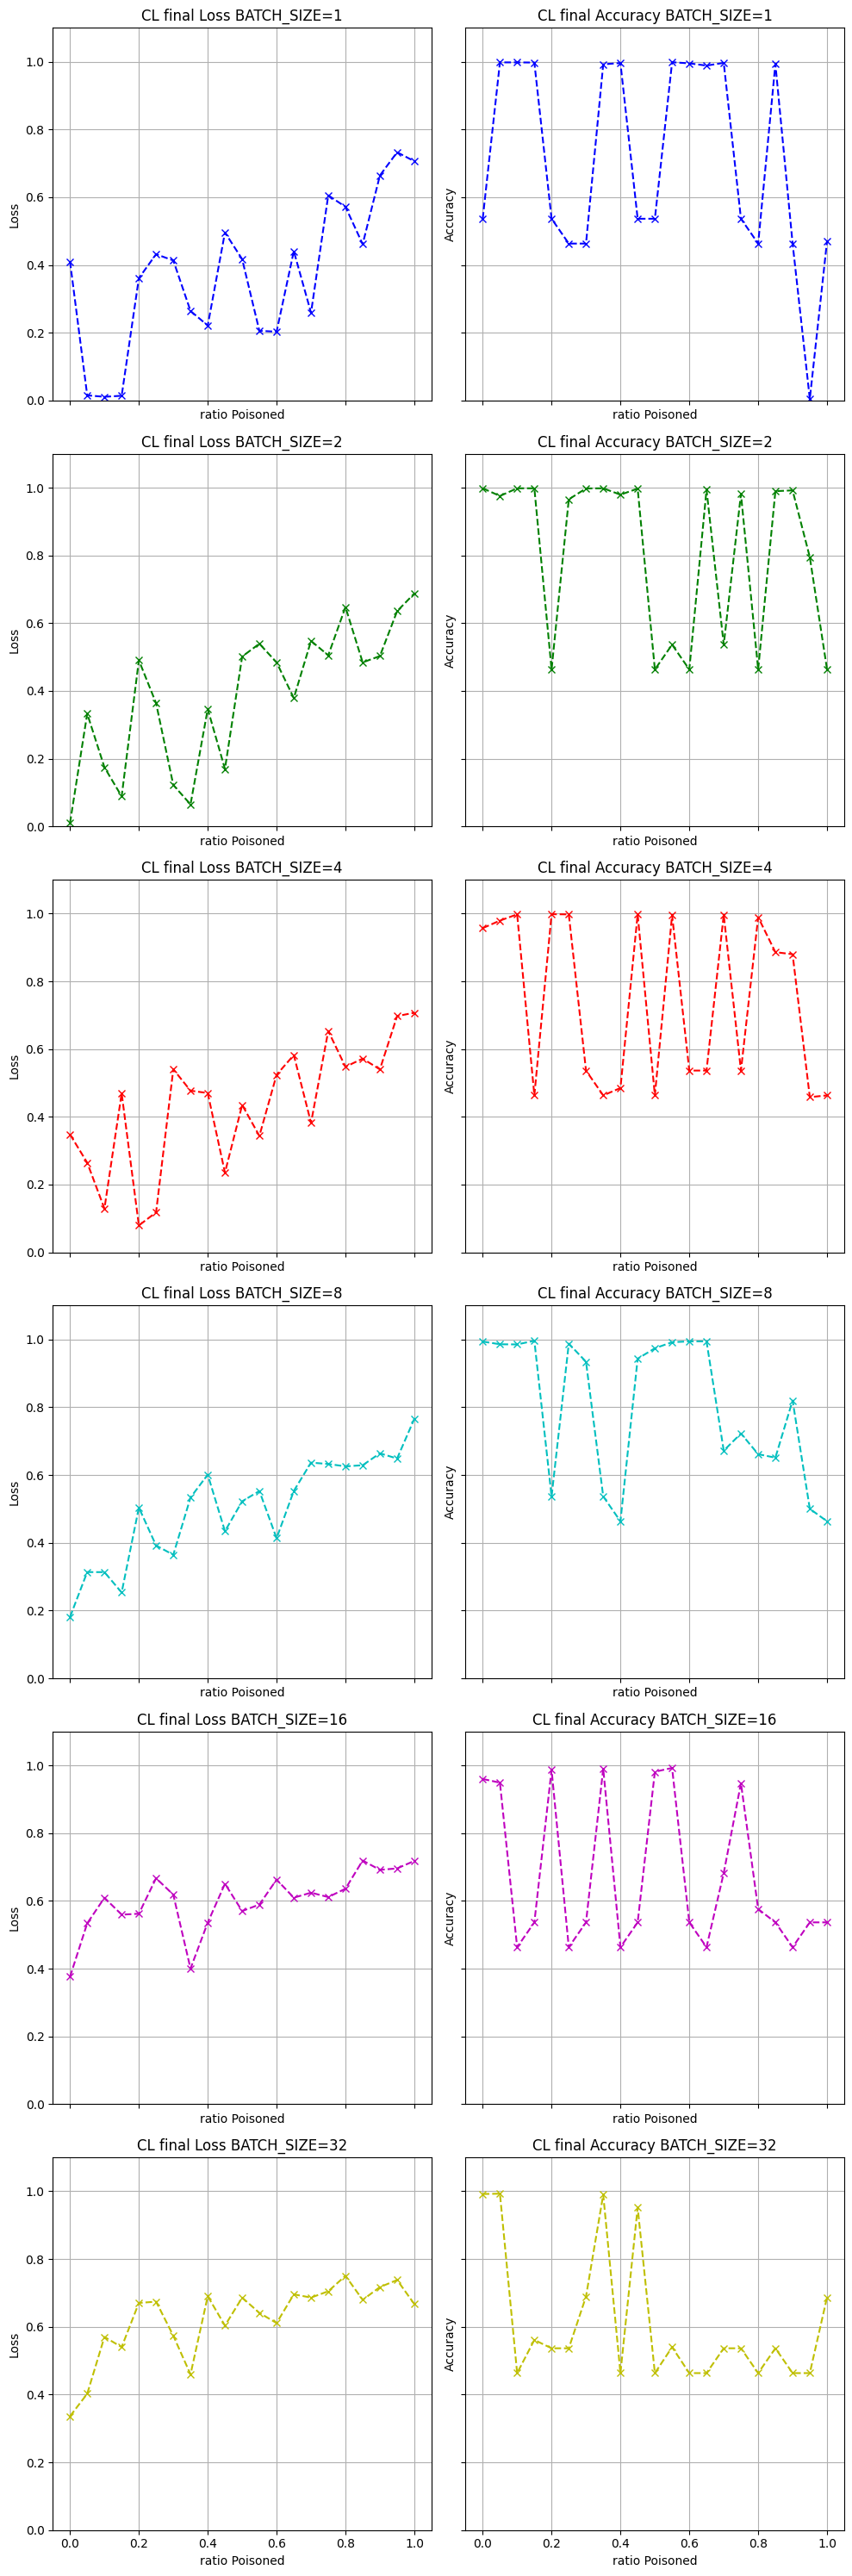

In [11]:
data_list = [
    ['CL_BATCH_SIZE','mnist_binary_rev2'],
    ['CL_BATCH_SIZE','mnist_binary_inverse_data'],
    ['CL_BATCH_SIZE','mnist_binary_random_data'],
    ['CL_MODEL2_BATCH_SIZE','mnist_binary_rev2'],
    ['CL_MODEL2_BATCH_SIZE','mnist_binary_inverse_data'],
    ['CL_MODEL2_BATCH_SIZE','mnist_binary_random_data'],
    ['FL_BATCH_SIZE','mnist_binary_rev2'],
    ['FL_BATCH_SIZE','mnist_binary_random_data'],
    ['FL_MODEL2_BATCH_SIZE','mnist_binary_rev2'],
    ['FL_MODEL2_BATCH_SIZE','mnist_binary_random_data'],
]
raw_path = r'results'
main_path = r'results/summary'
os.makedirs(main_path, exist_ok=True)

for f1,f2 in data_list:
    df_list = []
    line_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for batch_i in [1,2,4,8,16,32]:
        for i in range(101):
            csv_path = os.path.join(raw_path,fr'{f1}{batch_i}\{f2}\poisoned_{i}\poisoned_{i}.csv')
            if os.path.exists(csv_path):
                df = pd.read_csv(csv_path)
                if df.empty:
                    df_list.append(pd.DataFrame({
                        'batch_size': [batch_i],
                        'poisoned': [i],
                        'loss': [np.nan],
                        'accuracy': [np.nan]
                    }))
                else:
                    df['poisoned'] = i
                    df['batch_size'] = batch_i
                    df = df[['batch_size','poisoned', 'loss', 'accuracy']]
                    df_list.append(df.iloc[-1:, :])
    df_all = pd.concat(df_list, ignore_index=True)
    csv_save_path = os.path.join(main_path,fr'{f1}-{f2}.csv')
    df_all.to_csv(csv_save_path, index=False)
    # print(df_all)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
    fig2, axs = plt.subplots(6, 2, figsize=(10, 30), sharex=True, sharey=True)

    # All records up to current
    fit_df = df_all.replace([np.inf, -np.inf], np.nan).dropna(subset=['loss', 'accuracy'])
    # print(fit_df)
    for idx,batch_i in enumerate([1,2,4,8,16,32]):
        fit_df_batch = fit_df[fit_df['batch_size'] == batch_i]
        poisoned = fit_df_batch['poisoned'].to_numpy()/100
        losses = fit_df_batch['loss'].to_numpy()
        accs = fit_df_batch['accuracy'].to_numpy()
        print(f"Batch size {batch_i}:")
        fit_line(poisoned, losses, accs, 'Loss', 'Accuracy')

        ax1.plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--', label='Loss CL BATCH_SIZE='+str(batch_i))
        ax1.set_ylabel('Loss')
        ax1.set_xlabel('ratio Poisoned')
        ax1.set_title('CL final Loss')
        ax1.grid(True)
        ax1.set_ylim(0, 2.1)
        ax1.legend()

        ax2.plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--', label='Accuracy CL BATCH_SIZE='+str(batch_i))
        ax2.set_xlabel('ratio Poisoned')
        ax2.set_ylabel('Accuracy')
        ax2.set_title('CL final Accuracy')
        ax2.grid(True)
        ax2.set_ylim(0, 1.1)
        ax2.legend()

        # Individual subplots
        axs[idx, 0].plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--')
        axs[idx, 0].set_ylabel('Loss')
        axs[idx, 0].set_xlabel('ratio Poisoned')
        axs[idx, 0].set_title(f'CL final Loss BATCH_SIZE={batch_i}')
        axs[idx, 0].grid(True)
        axs[idx, 0].set_ylim(0, 2.1)

        axs[idx, 1].plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--')
        axs[idx, 1].set_xlabel('ratio Poisoned')
        axs[idx, 1].set_ylabel('Accuracy')          
        axs[idx, 1].set_title(f'CL final Accuracy BATCH_SIZE={batch_i}')
        axs[idx, 1].grid(True)
        axs[idx, 1].set_ylim(0, 1.1)

    save_name_path2 = os.path.join(main_path,fr'{f1}-{f2}_subplots.jpg')
    fig2.tight_layout()
    fig2.savefig(save_name_path2)

    fig.tight_layout()
    save_name_path = os.path.join(main_path,fr'{f1}-{f2}.jpg')
    fig.savefig(save_name_path)